In [6]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import os
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras import regularizers, optimizers
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:


data_dir = '/content/drive/MyDrive/Image Classification Data'
xray_labels = np.load(os.path.join(data_dir, 'xray_labels.npy'))
xray_data = np.load(os.path.join(data_dir, 'xray_data.npy'))

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xray_data, xray_labels, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [11]:

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (6108, 224, 224)
Validation set shape: (1527, 224, 224)
Testing set shape: (1909, 224, 224)


In [12]:
print("Training set shape:", y_train.shape)
print("Validation set shape:", y_val.shape)
print("Testing set shape:", y_test.shape)

Training set shape: (6108,)
Validation set shape: (1527,)
Testing set shape: (1909,)


In [13]:


# Convert class labels to binary format
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.transform(y_val)
y_test = lb.transform(y_test)


In [14]:
y_train

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:


# Build a baseline fully connected model
baseline_model = Sequential()
baseline_model._name = "Baseline"


# Add a Conv2D layer with 32 filters and 3x3 kernel size
baseline_model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
baseline_model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))

# Flatten the output of the convolutional layers
baseline_model.add(Flatten())


baseline_model.add(Dense(16, activation='relu')) 

baseline_model.add(Dense(1, activation='sigmoid')) 

# Define early stopping callback
trainCallback = EarlyStopping(monitor='accuracy', min_delta=1e-2, patience=5)


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
)

baseline = baseline_model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=64,
                   validation_data=(X_val, y_val),
                   callbacks=[trainCallback])


Epoch 1/50


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


96/96 [==============================] - 619s 6s/step - loss: 0.0000e+00 - accuracy: 0.4219 - val_loss: 0.0000e+00 - val_accuracy: 0.4309
Epoch 2/50
96/96 [==============================] - 594s 6s/step - loss: 0.0000e+00 - accuracy: 0.4199 - val_loss: 0.0000e+00 - val_accuracy: 0.4309
Epoch 3/50
96/96 [==============================] - 601s 6s/step - loss: 0.0000e+00 - accuracy: 0.4199 - val_loss: 0.0000e+00 - val_accuracy: 0.4309
Epoch 4/50
96/96 [==============================] - 596s 6s/step - loss: 0.0000e+00 - accuracy: 0.4199 - val_loss: 0.0000e+00 - val_accuracy: 0.4309
Epoch 5/50
96/96 [==============================] - 597s 6s/step - loss: 0.0000e+00 - accuracy: 0.4199 - val_loss: 0.0000e+00 - val_accuracy: 0.4309
Epoch 6/50
96/96 [==============================] - 601s 6s/step - loss: 0.0000e+00 - accuracy: 0.4199 - val_loss: 0.0000e+00 - val_accuracy: 0.4309


In [ ]:
loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)


60/60 [==============================] - 50s 833ms/step - loss: 0.0000e+00 - accuracy: 0.4301
Test loss: 0.0
Test accuracy: 0.43006810545921326


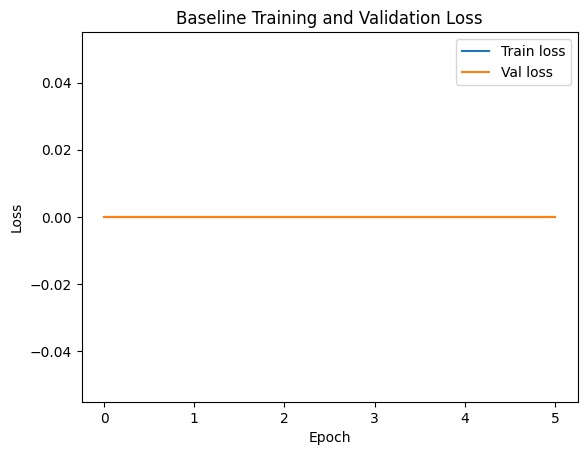

In [ ]:


# Plot training and validation loss history
history = baseline.history
train_loss = history['loss']
val_loss = history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Baseline Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



In [ ]:


# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))


# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
191/191 [==============================] - 811s 4s/step - loss: 0.4994 - accuracy: 0.7565 - val_loss: 0.3774 - val_accuracy: 0.8382
Epoch 2/10
191/191 [==============================] - 812s 4s/step - loss: 0.3158 - accuracy: 0.8651 - val_loss: 0.3121 - val_accuracy: 0.8749
Epoch 3/10
191/191 [==============================] - 773s 4s/step - loss: 0.2268 - accuracy: 0.9062 - val_loss: 0.2776 - val_accuracy: 0.8926
Epoch 4/10
191/191 [==============================] - 773s 4s/step - loss: 0.1710 - accuracy: 0.9301 - val_loss: 0.2780 - val_accuracy: 0.9018
Epoch 5/10
191/191 [==============================] - 806s 4s/step - loss: 0.1387 - accuracy: 0.9476 - val_loss: 0.2915 - val_accuracy: 0.9083
Epoch 6/10
191/191 [==============================] - 806s 4s/step - loss: 0.1045 - accuracy: 0.9612 - val_loss: 0.3002 - val_accuracy: 0.9044
Epoch 7/10
191/191 [==============================] - 771s 4s/step - loss: 0.0858 - accuracy: 0.9686 - val_loss: 0.3328 - val_accuracy: 0.9064

In [ ]:
loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)


60/60 [==============================] - 60s 996ms/step - loss: 0.3999 - accuracy: 0.8989
Test loss: 0.3999139964580536
Test accuracy: 0.8988999724388123


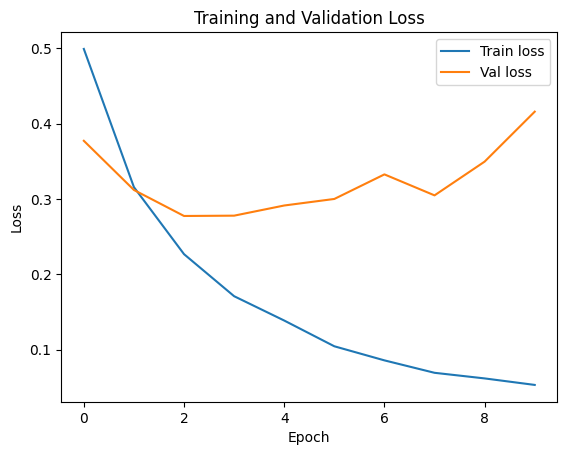

In [ ]:



# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
# overfitting -- so adding L2 regularization

In [ ]:


# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation, with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))



Epoch 1/10
191/191 [==============================] - 857s 4s/step - loss: 1.1450 - accuracy: 0.7073 - precision_1: 0.7231 - recall_1: 0.8027 - val_loss: 0.8321 - val_accuracy: 0.7597 - val_precision_1: 0.9211 - val_recall_1: 0.6318
Epoch 2/10
191/191 [==============================] - 815s 4s/step - loss: 0.7483 - accuracy: 0.7711 - precision_1: 0.8012 - recall_1: 0.8052 - val_loss: 0.6968 - val_accuracy: 0.7787 - val_precision_1: 0.8899 - val_recall_1: 0.6974
Epoch 3/10
191/191 [==============================] - 831s 4s/step - loss: 0.6166 - accuracy: 0.8003 - precision_1: 0.8225 - recall_1: 0.8360 - val_loss: 0.5866 - val_accuracy: 0.7931 - val_precision_1: 0.8055 - val_recall_1: 0.8389
Epoch 4/10
191/191 [==============================] - 808s 4s/step - loss: 0.5683 - accuracy: 0.8024 - precision_1: 0.8268 - recall_1: 0.8340 - val_loss: 0.5617 - val_accuracy: 0.7859 - val_precision_1: 0.7591 - val_recall_1: 0.9137
Epoch 5/10
191/191 [==============================] - 750s 4s/step -

In [ ]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:



# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation, with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer with a learning rate of 0.01
opt = optimizers.Adam(lr=0.01)

# Compile the model with the defined optimizer
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))


Epoch 1/10
191/191 [==============================] - 668s 3s/step - loss: 4.8690 - accuracy: 0.5727 - precision: 0.5797 - recall: 0.9574 - val_loss: 0.9840 - val_accuracy: 0.5691 - val_precision: 0.5691 - val_recall: 1.0000
Epoch 2/10
191/191 [==============================] - 624s 3s/step - loss: 0.9096 - accuracy: 0.5801 - precision: 0.5801 - recall: 1.0000 - val_loss: 0.8572 - val_accuracy: 0.5691 - val_precision: 0.5691 - val_recall: 1.0000
Epoch 3/10
191/191 [==============================] - 612s 3s/step - loss: 0.8160 - accuracy: 0.5801 - precision: 0.5801 - recall: 1.0000 - val_loss: 0.7876 - val_accuracy: 0.5691 - val_precision: 0.5691 - val_recall: 1.0000
Epoch 4/10
191/191 [==============================] - 607s 3s/step - loss: 0.7632 - accuracy: 0.5801 - precision: 0.5801 - recall: 1.0000 - val_loss: 0.7481 - val_accuracy: 0.5691 - val_precision: 0.5691 - val_recall: 1.0000
Epoch 5/10
191/191 [==============================] - 605s 3s/step - loss: 0.7318 - accuracy: 0.5801

In [1]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#next model to update filters from 32 to 64

In [ ]:


# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation, with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer with a learning rate of 0.001
opt = optimizers.Adam(lr=0.001)

# Compile the model with the defined optimizer
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
 31/191 [===>..........................] - ETA: 17:20 - loss: 2.1974 - accuracy: 0.5544 - precision_1: 0.5912 - recall_1: 0.7143

In [2]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

NameError: ignored

In [ ]:



# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Model 1: Achieved an accuracy of 43.01% on the test set. This model achieved perfect training accuracy but very poor test accuracy. This suggests that the model has overfit to the training data and is unable to generalize to new data.

Model 2 (final model): Achieved an accuracy of 89.89% on the test set, with a test loss of 0.3999. This model achieved high accuracy and low loss on both the training and test data, indicating that it has learned the underlying patterns in the data well and is able to generalize to new data. The test accuracy is almost 90%, which is very good.

Model 3: Achieved an accuracy of 84.22% on the validation set, with a precision of 86.87%, a recall of 85.75%, and a validation loss of 0.4438.
This model achieved high accuracy and precision, indicating that it is able to correctly identify positive cases of COVID-19. The recall score is also high, indicating that it is able to correctly identify most positive cases. The validation accuracy and validation precision are slightly lower, which suggests that the model may be overfitting to the training data.

Model 4: Achieved an accuracy of 58.01% on the test set, with a precision of 58.01%, a recall of 100%, and a test loss of 0.7023. This model achieved low accuracy and precision, indicating that it is not able to correctly identify positive cases of COVID-19. However, the recall score is 1.0, which means that it is able to correctly identify all positive cases. This suggests that the model is biased towards predicting positive cases, which may be due to class imbalance in the dataset.

Model 5: Achieved an accuracy of 81.86% on the test set, with a precision of 84.68%, a recall of 83.91%, and a test loss of 0.5084.
This model achieved moderate accuracy, precision, and recall, indicating that it is able to correctly identify positive cases of COVID-19, but not with high confidence. The precision score is slightly lower than the recall score, which suggests that the model may be making more false positive predictions than false negative predictions.